# Exercise 01: Matplotlib

## 1. A. & B. Scatterplots and histograms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


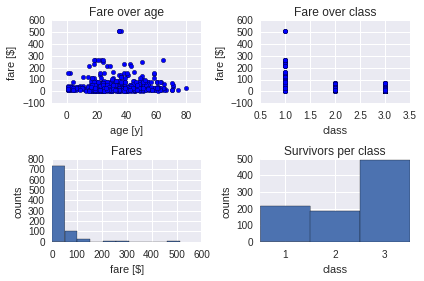

In [3]:
fig, ax = plt.subplots(2,2)

# first subplot: fare over age
ax[0,0].set_title('Fare over age')
ax[0,0].set_xlabel('age [y]')
ax[0,0].set_ylabel('fare [$]')
ax[0,0].scatter(titanic['age'],titanic['fare'])

# second subplot: Fare over class
ax[0,1].set_title('Fare over class')
ax[0,1].set_xlabel('class')
ax[0,1].set_ylabel('fare [$]')
ax[0,1].scatter(titanic['pclass'],titanic['fare'])

# third subplot: Fares
ax[1,0].set_title('Fares')
ax[1,0].set_xlabel('fare [$]')
ax[1,0].set_ylabel('counts')
ax[1,0].hist(titanic['fare'])

# fourth subplot: Survivors per class
ax[1,1].set_title('Survivors per class')
ax[1,1].set_xlabel('class')
ax[1,1].set_ylabel('counts')
ax[1,1].hist(titanic['pclass'],bins=3)
ax[1,1].xaxis.set_ticks([1.33,2,2.66])
ax[1,1].set_xticklabels([1,2,3])

fig.tight_layout()

figname = 'titanic_explorative_analysis.pdf'
plt.savefig(figname)

## 1. C. Open figure in inkscape

In [4]:
#! inkscape {figname}

## 1. D. Heatmap for survival

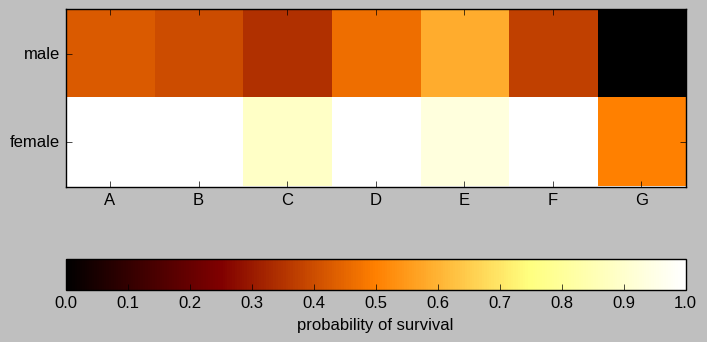

In [7]:
import importlib
import seaborn.apionly
importlib.reload(seaborn.apionly);

survivors = np.zeros((2,3))
male =  titanic.loc[titanic['sex'] == 'male']
female =  titanic.loc[titanic['sex'] == 'female']

decks = ['A','B','C','D','E','F','G']

male_s = []
female_s = []

for deck in decks:
    male_deck = male.loc[male['deck'] == deck]
    male_survived = male_deck.loc[male_deck['survived'] == 1]
    male_survived = len(male_survived)
    if male_survived != 0:
        male_survived = male_survived/len(male_deck)
    male_s.append(male_survived)
    
    female_deck = female.loc[female['deck'] == deck]
    female_survived = female_deck.loc[female_deck['survived'] == 1]
    female_survived = len(female_survived)
    female_survived = female_survived/len(female_deck)
    female_s.append(female_survived)
    
male_s = np.asarray(male_s).reshape((1,len(male_s)))
female_s = np.asarray(female_s).reshape((1,len(female_s)))  
survivors = np.vstack([male_s,female_s])  
    
fig, ax = plt.subplots()
pos = ax.imshow(survivors, interpolation='nearest', cmap='afmhot')
ax.yaxis.set_ticks((0,1))
ax.set_yticklabels(['male','female'])
ax.set_xticklabels(['0','A', 'B', 'C', 'D', 'E', 'F', 'G'])
cbar = fig.colorbar(pos,orientation='horizontal')
cbar.set_label('probability of survival')

# 2. A. & B lying with plots

##### Histogram bins

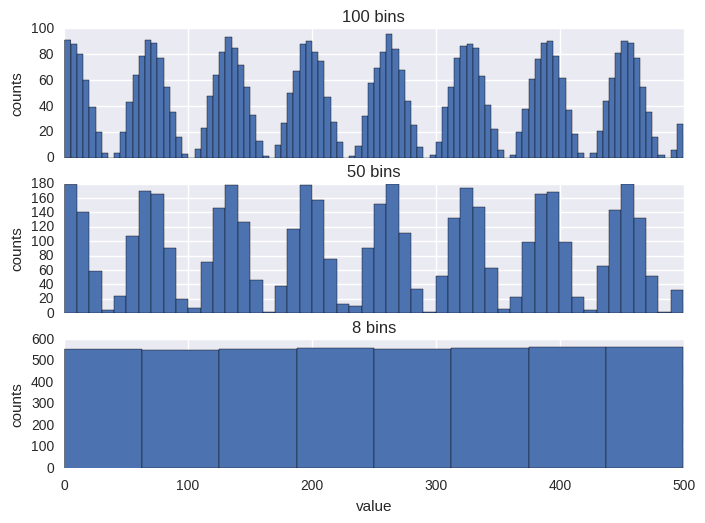

In [8]:
import seaborn
importlib.reload(seaborn)

# weird and awkward way to create some sample data for a histogram...
N = 500
num = np.sin(np.linspace(1,50.0,N))*10
num = num.astype(np.int)
num = num - num.min()

values = []
for i in range(1,N):
    nums = [i + np.random.uniform(-0.5,0.5) for n in range(num[i])]
    values.append(nums)

values = np.asarray(values)
new_values = values[0]
for val in values[1:]:
    new_values = np.hstack([new_values, val])

# plot the histogram with different bin numbers
fig, axes = plt.subplots(3,1)

# 100 bins show the full beauty of the distribution
axes[0].set_title('100 bins')
axes[0].hist(new_values, bins=100)
axes[0].set_xticklabels([])

# 50 bins still capture the sinusoidal features
axes[1].set_title('50 bins')
axes[1].hist(new_values, bins=50)
axes[1].set_xticklabels([])

# 8 bins show a nuniform distribution
axes[2].set_title('8 bins')
axes[2].hist(new_values, bins=8)
axes[2].set_xlabel('value')

for ax in axes:
    ax.set_ylabel('counts')


##### Axis ranges

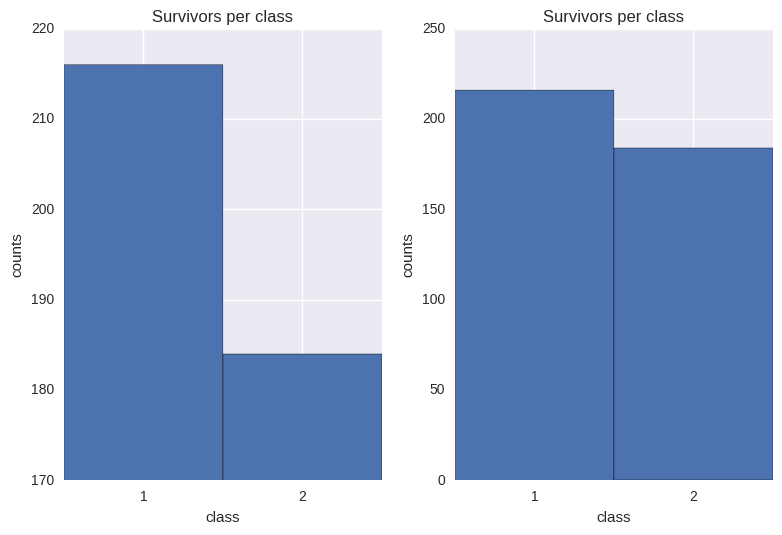

In [9]:
# look only at the survivors from classes 1 & 2
titanic = titanic.loc[titanic['pclass'].isin([1,2])]

# set the plot up
fig, axes = plt.subplots(1,2)

for ax in axes:
    ax.set_title('Survivors per class')
    ax.set_xlabel('class')
    ax.set_ylabel('counts')


# plot with two bins and adjust tick positions
for ax in axes:
    ax.hist(titanic['pclass'],bins=2)
    ax.xaxis.set_ticks([1.25,1.75])
    ax.set_xticklabels([1,2])

# adjusting the range on the x-axis is fine and helps to have a clearer
# plot
axes[0].set_xlim((1,2))
axes[1].set_xlim((1,2))

# adjusting the range on the y-axis suggests, that more than double
# the number 
axes[0].set_ylim(170,220)

fig.tight_layout()

##### Logarithmic plots

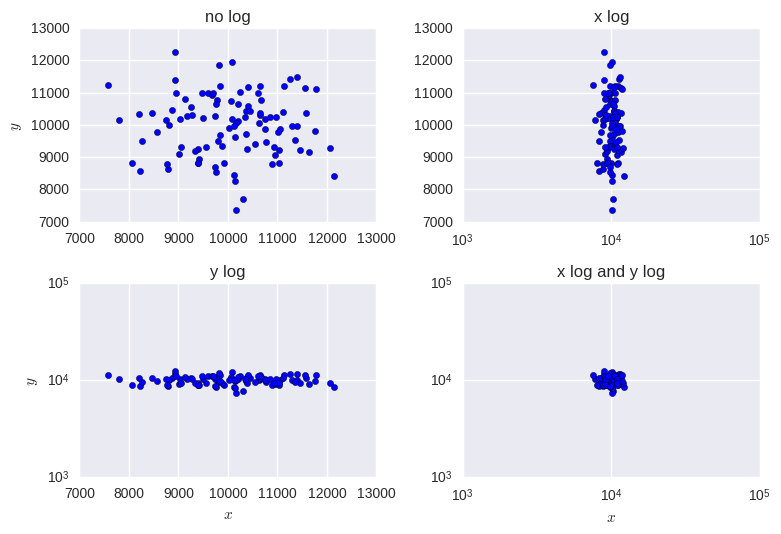

In [30]:
x = np.random.normal(10000,1000,size=100)
y = np.random.normal(10000,1000,size=100)

fig, axes = plt.subplots(2,2)
axes[0,0].scatter(x,y)
axes[0,0].set_title('no log')
axes[0,1].scatter(x,y)
axes[0,1].set_title('x log')
axes[1,0].scatter(x,y)
axes[1,0].set_title('y log')
axes[1,1].scatter(x,y)
axes[1,1].set_title('x log and y log')

axes[0,0].set_ylabel('$y$')
axes[0,1].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_xlabel('$x$')
axes[1,0].set_ylabel('$y$')
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].set_xlabel('$x$')

fig.tight_layout()